<a href="https://colab.research.google.com/github/DevBatra05/AIML_Sem_4/blob/main/Lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix


In [2]:
# -------------------- Load the Dataset --------------------
housing = fetch_california_housing(as_frame=True)
data = housing.data
target = housing.target

In [3]:
# Add target column to the data
data['MedHouseVal'] = target
print(data.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


No missing values detected.


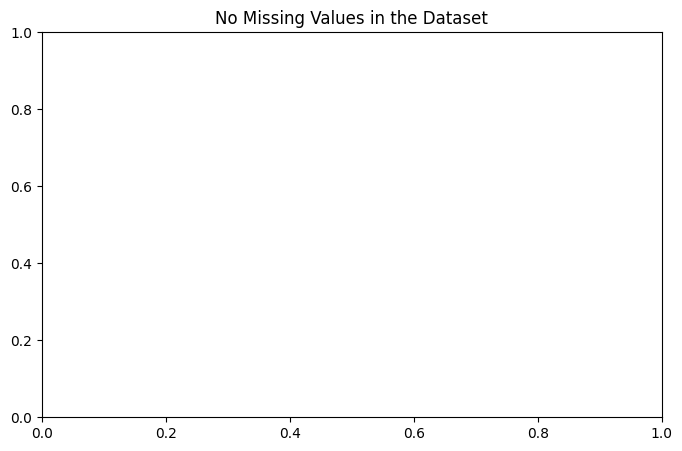

In [4]:
# -------------------- Data Cleaning --------------------
# Check for missing values
missing_percent = data.isnull().mean() * 100

plt.figure(figsize=(8, 5))
if missing_percent.sum() > 0:
    print("Missing values found, plotting missing values...")
    sns.barplot(x=missing_percent[missing_percent > 0].index,
                y=missing_percent[missing_percent > 0].values,
                palette='Blues_d')
    plt.title('Percentage of Missing Values by Feature')
    plt.ylabel('Percentage')
    plt.xlabel('Features')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    # Impute missing values
    data.fillna(data.median(), inplace=True)
    print("Missing values imputed.")
else:
    print("No missing values detected.")
    plt.title('No Missing Values in the Dataset')
    plt.show()

In [5]:
# Check for duplicate rows and remove them
duplicates = data.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicate rows. Removing duplicates.")
    data.drop_duplicates(inplace=True)

print(f"Data shape after cleaning: {data.shape}")

Data shape after cleaning: (20640, 9)


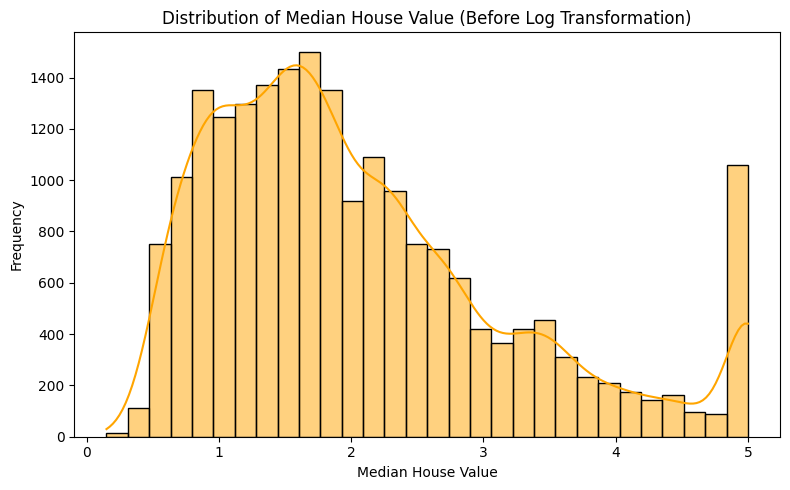

In [6]:
# -------------------- Data Transformation --------------------
# Visualize the target variable distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['MedHouseVal'], kde=True, bins=30, color='orange')
plt.title('Distribution of Median House Value (Before Log Transformation)')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [7]:
# Log-transform the target variable to normalize its distribution
data['MedHouseVal'] = np.log1p(data['MedHouseVal'])

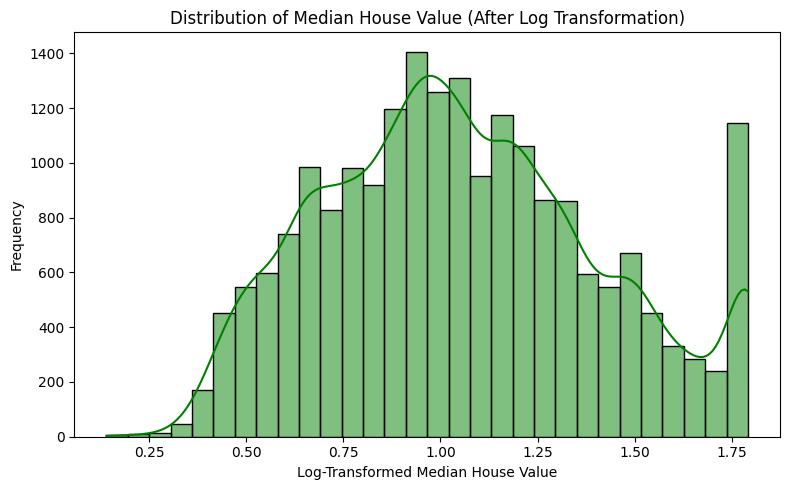

In [8]:
# Visualize the transformed target variable distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['MedHouseVal'], kde=True, bins=30, color='green')
plt.title('Distribution of Median House Value (After Log Transformation)')
plt.xlabel('Log-Transformed Median House Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [9]:
# Standardize numerical features
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(data.iloc[:, :-1]), columns=data.columns[:-1])

In [10]:
# Combine scaled features with the target
data = pd.concat([scaled_features, data['MedHouseVal']], axis=1)

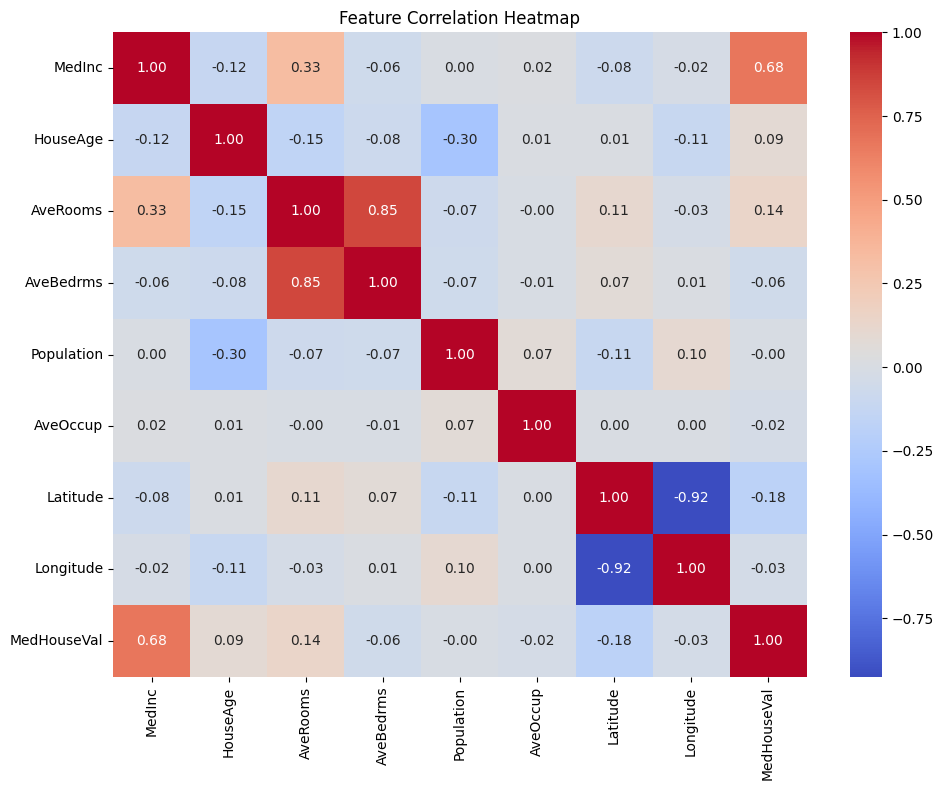

In [11]:
# -------------------- Feature Correlation --------------------
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [13]:
# -------------------- Data Reduction --------------------
# Variance thresholding to remove low-variance features
selector = VarianceThreshold(threshold=0.01)
features = data.iloc[:, :-1]  # Exclude target column
reduced_features = selector.fit_transform(features)
selected_columns = features.columns[selector.get_support(indices=True)]

In [14]:
# Update the data with reduced features
data = pd.DataFrame(reduced_features, columns=selected_columns)
data['MedHouseVal'] = target  # Re-attach the target column

print(f"Number of features after variance thresholding: {data.shape[1] - 1}")

Number of features after variance thresholding: 8


<ipython-input-15-5895535f37cf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features.columns, y=variances, palette='Blues_d')


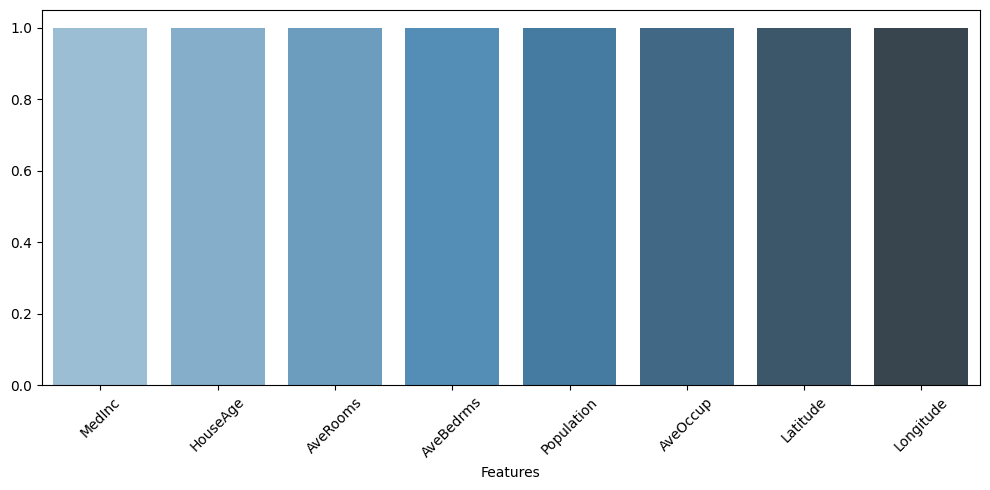

In [15]:
# Visualize feature variances
variances = selector.variances_
plt.figure(figsize=(10, 5))
sns.barplot(x=features.columns, y=variances, palette='Blues_d')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
 #-------------------- #Data Splitting --------------------
# Split into features (X) and target (y)
housing = fetch_california_housing(as_frame=True)
data = housing.data
data['MedHouseVal'] = housing.target  # Ensure the target column exists
X = data.drop(columns=['MedHouseVal'])
y = data['MedHouseVal']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------- Output Summary --------------------
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

Training features shape: (16512, 8)
Testing features shape: (4128, 8)


In [20]:
#Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.datasets import fetch_california_housing
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

In [22]:
# Performance metrics for Linear Regression
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)

In [23]:
# ----- Logistic Regression (Binary Classification) -----
# Convert target into binary classification (above/below median value)
median_value = y.median()
y_binary = (y > median_value).astype(int)

In [24]:
# Split dataset again for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_binary, test_size=0.2, random_state=42)
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

In [25]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clf_scaled, y_train_clf)
y_pred_log = log_reg.predict(X_test_clf_scaled)

In [26]:
# Compute confusion matrix before visualization
conf_matrix = confusion_matrix(y_test_clf, y_pred_log)

# Performance metrics for Logistic Regression
accuracy_log = accuracy_score(y_test_clf, y_pred_log)
classification_rep_log = classification_report(y_test_clf, y_pred_log)

In [27]:
# Print Logistic Regression Metrics
print("\nLogistic Regression Metrics:")
print(f"Accuracy: {accuracy_log:.4f}")
print("Classification Report:")
print(classification_rep_log)


Logistic Regression Metrics:
Accuracy: 0.8261
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2077
           1       0.83      0.82      0.82      2051

    accuracy                           0.83      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.83      0.83      0.83      4128



<ipython-input-28-9a8f66e679ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=metrics, palette="Blues_r")


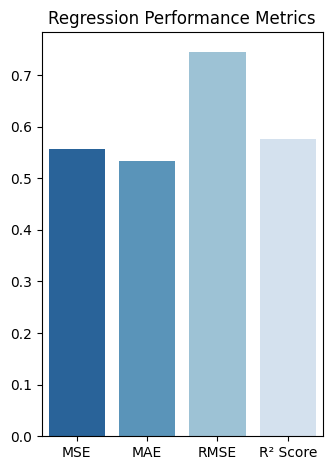

In [28]:
# Regression Metrics Bar Chart
plt.subplot(1, 2, 2)
metrics = [mse_lin, mae_lin, rmse_lin, r2_lin]
labels = ["MSE", "MAE", "RMSE", "R² Score"]
sns.barplot(x=labels, y=metrics, palette="Blues_r")
plt.title("Regression Performance Metrics")

plt.tight_layout()
plt.show()

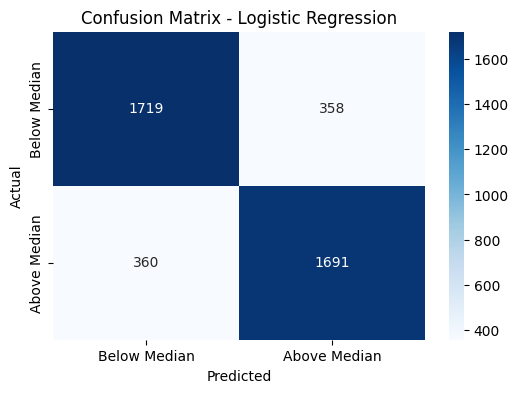

In [29]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Below Median", "Above Median"], yticklabels=["Below Median", "Above Median"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [30]:
# Print Linear Regression Metrics
print("\nLinear Regression Metrics:")
print(f"MSE: {mse_lin:.4f}")
print(f"MAE: {mae_lin:.4f}")
print(f"R² Score: {r2_lin:.4f}")
print(f"RMSE: {rmse_lin:.4f}")


Linear Regression Metrics:
MSE: 0.5559
MAE: 0.5332
R² Score: 0.5758
RMSE: 0.7456


Text(0.5, 1.0, 'Linear Regression Residual Plot')

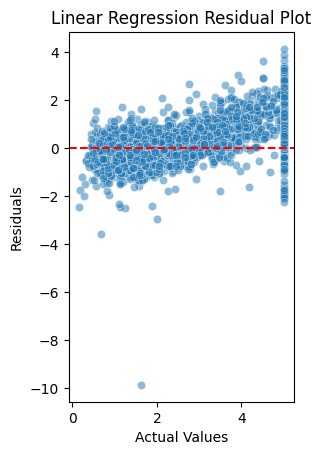

In [31]:
# Residual Plot for Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_test - y_pred_lin, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Linear Regression Residual Plot")
